# Ejercicio

Utilizando una red LSTM crear un generador de una secuencia de texto basada en la obra `CRIMEN Y CASTIGO` de **FIODOR DOSTOIEVSKI** que cumpla las siguientes características:

- Limpiar el texto de posibles caracteres indeseados
- Implementar `PlotLossess` Callback para evaluar los resultados
- Implementar `EarlyStopping` con los parámetros que consideres
- El accuracy del modelo debe ser superior a 70% (Ejecutar en GPU en Colab o Kaggle)
- Configurar un valor de `temperatura` acorde 
- El modelo debe poder generar(predecir) 500 palabras
- Salvar el modelo

El corpus lo puedes encontrar [Aquí](https://github.com/senpai-academy/DSB-1-2023/blob/main/6.ml_deep_learning/ejercicios/data/Crimen-y-Castigo.txt)


In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers, models
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.inputs.keras import PlotLossesCallback
import warnings
warnings.filterwarnings("ignore")

BASE_FOLDER = '/kaggle/input/crimen-y-castigo/Crimen-y-Castigo.txt'

In [ ]:
print(BASE_FOLDER)

In [20]:
# TODO Limpieza y preparación corpus

# Cargamos texto del Crimen y Castigo
with open(BASE_FOLDER,'r') as f:
    replace_chars = {'-': ' ',
                    '»':'',
                    '*':'',
                    '«':'',
                    'Ф':'',
                    'č':'',
                    'д':'',
                    'и':'',
                    'й':'',
                    'л':'',
                    'в':'',
                    'ч':'',
                    'Д':'',
                    'т':'',
                    'к':'',
                    'ë':'',
                    'ё':'',
                    'ф':'',
                    'м':'',
                    '\n':'',
                    'ä':'',
                    'ö':'',
                    'ï':'',
                     'û':''
                     
    
    }
    corpus = f.read().lower()
    for old, new in replace_chars.items():
        corpus = corpus.replace(old,new)



In [24]:
maxlen = 80 #longitud de las secuencias
step = 3 # cada cuantas letras empezar una secuencia

sentences = []
next_chars = []

for i in range(0,len(corpus) - maxlen,step):
    sentences.append(corpus[i: i + maxlen])
    next_chars.append(corpus[i + maxlen])

In [25]:
unique_chars = sorted(list(set(corpus)))
char_indices = {char : i for i,char in enumerate(unique_chars) }
print(char_indices)

{' ': 0, '!': 1, '(': 2, ')': 3, ',': 4, '.': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '7': 12, '8': 13, '9': 14, ':': 15, ';': 16, '?': 17, 'a': 18, 'b': 19, 'c': 20, 'd': 21, 'e': 22, 'f': 23, 'g': 24, 'h': 25, 'i': 26, 'j': 27, 'k': 28, 'l': 29, 'm': 30, 'n': 31, 'o': 32, 'p': 33, 'q': 34, 'r': 35, 's': 36, 't': 37, 'u': 38, 'v': 39, 'w': 40, 'x': 41, 'y': 42, 'z': 43, '¡': 44, '¿': 45, 'á': 46, 'é': 47, 'í': 48, 'ñ': 49, 'ó': 50, 'ú': 51, 'ü': 52, 'а': 53, 'е': 54, 'о': 55, 'р': 56, 'с': 57, 'х': 58, '—': 59}


In [26]:
import numpy as np

# Vectorizacion (one hot encoding)
x = np.zeros((len(sentences), maxlen,len(unique_chars)), dtype=bool) 
y = np.zeros((len(sentences), len(unique_chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i,t,char_indices[char]] = 1
    y[i,char_indices[next_chars[i]]] = 1
print(x.shape)
print(y.shape)

(345731, 80, 60)
(345731, 60)


In [30]:
x[0].sum()

80

In [33]:
# Modelo con LSTM
from tensorflow.keras import layers
from tensorflow.keras import models

# Cuando se concatenan LSTM, parametro return_sequences=True excepto en la ultima
# Las capas intermedias pasan toda la secuencia de outputs, pero la ultima solo pasa el ultimo output
model = models.Sequential()
model.add(LSTM(256, input_shape=(maxlen,len(unique_chars)),return_sequences=True)) # devuelve una secuencia de vectores de 128 dimensiones
model.add(LSTM(64))
model.add(layers.Dense(len(unique_chars), activation='softmax')) # softmax para que el output sume 1

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 256)           324608    
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 60)                3900      
                                                                 
Total params: 410,684
Trainable params: 410,684
Non-trainable params: 0
_________________________________________________________________


In [32]:
#TODO Callbacks
plot_loss_1 = PlotLossesCallback()
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='val_accuracy', #TODO 
                           patience=5, #TODO 
                           restore_best_weights=True,
                           mode='max')





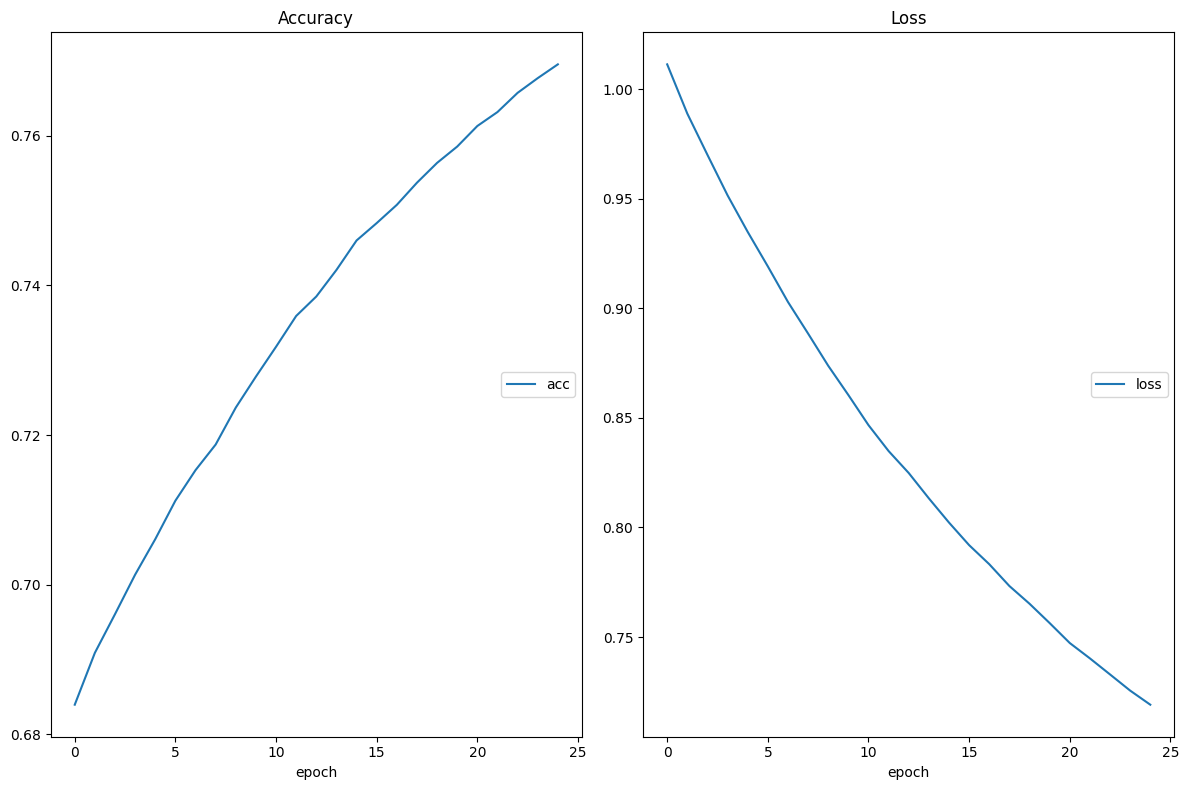

Accuracy
	acc              	 (min:    0.684, max:    0.770, cur:    0.770)
Loss
	loss             	 (min:    0.719, max:    1.011, cur:    0.719)
1351/1351 [==============================] - 33s 24ms/step - loss: 0.7191 - acc: 0.7696


In [39]:
# Entrenar el modelo
%time
plot_loss_1 = PlotLossesCallback()
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='val_accuracy', #TODO 
                           patience=4, #TODO 
                           restore_best_weights=True,
                           mode='max')
history = model.fit(x, #TODO 
                              y, #TODO 
                              epochs = 25, #TODO 
                              batch_size = 256,  
                              callbacks = [plot_loss_1,tl_checkpoint_1, early_stop],
                               
                              #TODO callbacks - agregar los 3 definidos
                              verbose=1)


In [44]:
import numpy as np

def transform_distribution(predictions, temperature):
    predictions = np.array(predictions).astype('float64')
    predictions = np.log(predictions) / temperature
    exp_predictions = np.exp(predictions) #TODO
    predictions = exp_predictions / np.sum(exp_predictions) # asegurarse que los valores suman 1 (probabilidad)
    probs = np.random.multinomial(1, predictions, 1)
    return np.argmax(probs)

In [49]:
import random
# generar secuencias arbitrarias de texto
predict_length = 500 #TODO
temperature = 0.4 #TODO

start_index = random.randint(0,len(corpus) - maxlen - 1)
input_text = corpus[start_index: start_index + maxlen]
print('Seed: ' + input_text)
generated_text = input_text

for i in range(predict_length):
    sampled = np.zeros((1, maxlen, len(unique_chars)))
    for t, char in enumerate(input_text):
        sampled[0,t,char_indices[char]] = 1.
    
    prediction = model.predict(sampled, verbose=0)[0]
    next_index = transform_distribution(prediction,temperature)
    next_char = unique_chars[next_index]
    
    #pegar el nuevo texto
    input_text += next_char
    generated_text += next_char
    input_text = input_text[1:]

generated_text

Seed: vas. no hagan ustedes caso.—pues bien—replicó pulkeria alexandrovna—. voy a ver 


'vas. no hagan ustedes caso.—pues bien—replicó pulkeria alexandrovna—. voy a ver a preguntarme o que si más queda esto procediendo, yo lo he visto.la joven marmeladoff, en el bolsillo de tener un poco abtito. raskolnikoff se abrió la puerta de raskolnikoff con una mujer al desconocido. seús descarda, frente a un movimio. esto es la habitación y no había dicho un pesiguio del patio.—¡oh, no es esto habrá tenido el fin se acercó a la menda. no estaba un primer de la casa de su imiga persona y en la persona y de este modo, mirando el con la palabra y la hubiera incomado.—¡oh di'

In [46]:
model.save('./data/gen.h5')